# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [7]:
df_data.describe()

,year
count,962.00
mean,"1,971.82"
std,33.81
min,"1,901.00"
25%,"1,948.00"
50%,"1,977.00"
75%,"2,001.00"
max,"2,020.00"


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [8]:
print("\nAre there any duplicate rows?")
print(df_data.duplicated().values.any())
duplicated_rows = df_data[df_data.duplicated()]
print(f'Number of duplicates: {len(duplicated_rows)}')


Are there any duplicate rows?
False
Number of duplicates: 0


### Check for NaN Values

In [9]:
print(f"\nAre there any NaN values present?")
print(df_data.isna().values.any())



Are there any NaN values present?
True


In [10]:
print('Which columns tend to have NaN values?')
df_data.isna().any()

Which columns tend to have NaN values?


year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

In [11]:
print('How many NaN values are there per column?')
df_data.isna().sum()

How many NaN values are there per column?


year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [12]:
print('Why do these columns have NaN values?')
df_data[df_data['organization_name'].isna()].head()

Why do these columns have NaN values?


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Germany,Male,NaN,NaN,NaN,DEU
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


Filtering on the NaN values in the birth date column we see that we get back a bunch of organisations, like the UN or the Red Cross.

In [13]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


That makes sense. We also see that since the organisation's name is in the full_name column, the organisation_name column contains NaN.

In addition, when we look at for rows where the organization_name column has no value, we also see that many prizes went to people who were not affiliated with a university or research institute. This includes many of the Literature and Peace prize winners.

In [14]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [15]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

#### Add a Column with the Prize Share as a Percentage

In [16]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denomenator

In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

In [18]:
df_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.33
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.25
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.25


# Challenge 1: Come up with 3 Questions

**Challenge**: A big part of data science is coming up with questions that you'd like to explore. This is the most difficult aspect to teach in a tutorial because it's completely open-ended and requires some creativity. Often times you will be asking questions of the data, that it actually cannot answer - and that's ok. That's all part of the process of discovery.

Pause here for a moment and think about the kind of data you saw in the columns. Write down at least 3 questions that you'd like to explore as part of this analysis. For example, your question might go like: "What percentage of the Nobel laureates were women?" or "How many prizes were given out in each category". **Practice coming up with a few of your own questions.**

In the upcoming lessons, you might find that we will write the code to answer some of your questions. And if not, your questions make for a great exercise to take this analysis even further.

1.   What is the most nominated category?
2.   What was the year with the greatest number of awards?

What is the most nominated category?


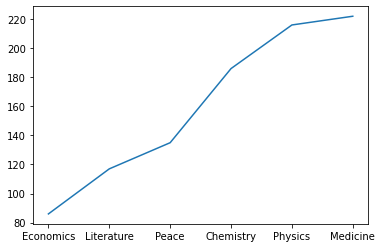

In [19]:
print('What is the most nominated category?')
plt.plot(df_data.category.groupby(df_data.category).count().sort_values().index, df_data.category.groupby(df_data.category).count().sort_values().values)
plt.show()

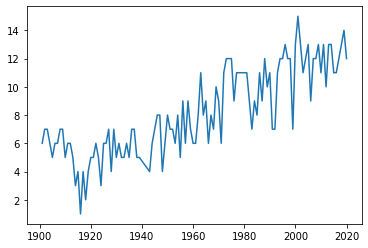

In [20]:
print()
plt.plot(df_data.year.groupby(df_data.year).count().index, df_data.year.groupby(df_data.year).count().values)
plt.show()

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [21]:
data = df_data.sex.value_counts()
fig = px.pie(values=data.values,
             names=data.index,
             title="Percentage of Male vs. Female Winners",
             hole = 0.5,
             width = 600)
fig.update_traces(textposition='inside', textfont_size=14, textinfo='percent')
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [22]:
# What are the names of the first 3 female Nobel laureates?

In [23]:
df_data[df_data.sex == 'Female'].head(3)
df_data[df_data.sex == 'Female'].sort_values('year', ascending=True)[:3]
df_data[df_data.sex == 'Female'].sort_values('year', ascending=True).head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [24]:
multiple_winners = df_data[df_data.duplicated(subset=['full_name']) == True]

multiple_winners = df_data[df_data.duplicated(subset=['full_name'], keep=False)]
print(f'There are {multiple_winners.full_name.nunique()}' \
      ' winners who were awarded the prize more than once:')
for winner in multiple_winners.full_name.unique():
  print('    - '+winner)

There are 6 winners who were awarded the prize more than once:
    - Marie Curie, née Sklodowska
    - Comité international de la Croix Rouge (International Committee of the Red Cross)
    - Linus Carl Pauling
    - Office of the United Nations High Commissioner for Refugees (UNHCR)
    - John Bardeen
    - Frederick Sanger


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [25]:
df_data.category.nunique()

6

In [26]:
df_data.category.value_counts()

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [27]:
df_data[['category']].groupby('category').count()

""
category
Chemistry
Economics
Literature
Medicine
Peace
Physics


In [28]:
prizes_per_category = df_data.category.value_counts()

fig = px.bar(x = df_data.category.value_counts().index,
             y = df_data.category.value_counts().values,
             title='number of prizes awarded by category',
             width=600, height=400)
 
fig.update_layout(xaxis_title='category', yaxis_title='number of prizes')
fig.show()

In [29]:
fig = px.bar(x = df_data.category.value_counts().index,
             y = df_data.category.value_counts().values,
             title='Number of Prizes Awarded per Category',
             width=600, height=400,
             color_continuous_scale='Aggrnyl',
             color = df_data.category.value_counts().values)
 
fig.update_layout(xaxis_title='Nobel Prize Category',
                  yaxis_title='Number of Prizes',
                  coloraxis_showscale=False)

fig.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [30]:
df_data[df_data.category == 'Economics'].sort_values('year').head(1)
df_data[df_data.category == 'Economics'].sort_values('year')[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

We can combine `.groupby()` and `.agg()` with the `.count()` function. This way we can count the number of men and women by prize category.

In [31]:
cat_men_women = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [32]:
fig = px.bar(cat_men_women,
             x = 'category',
             y = 'prize',
             color = 'sex',
             title='Number of Prizes per Category split by Men and Women',
             width=650, height=400)
 
fig.update_layout(xaxis_title='Nobel Prize Category',
                  yaxis_title='Number of Prizes')
fig.show()

We see that overall the imbalance is pretty large with physics, economics, and chemistry. Women are somewhat more represented in categories of Medicine, Literature and Peace. Splitting bar charts like this is an incredibly powerful way to show a more granular picture.

# Using Matplotlib to Visualise Trends over Time

Now let's look at how things have changed over time. This will give us a chance to review what we learnt about creating charts with two y-axes in Matplotlib and generating arrays with NumPy.

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [33]:
# Count the number of prizes awarded every year.
prizes_per_year = df_data.groupby('year', as_index=False).agg({'prize': pd.Series.count})
prize_per_year = df_data.groupby(by='year').count().prize 

In [34]:
# Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
rolling_avg = prizes_per_year.rolling(window=5).mean()

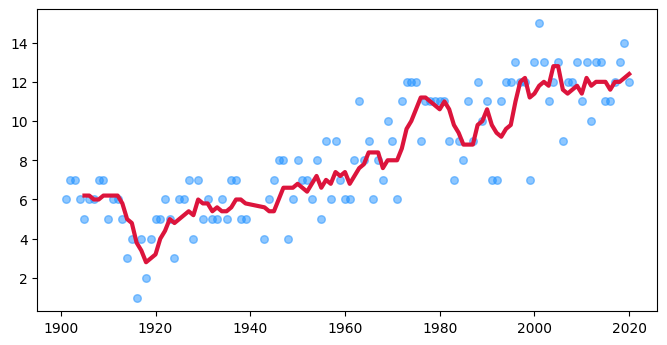

In [35]:
# Using Matplotlib superimpose the rolling average on a scatter plot.
plt.figure(figsize=(8,4), dpi=100)

plt.scatter(prizes_per_year.year,
            prizes_per_year.prize,
            c='dodgerblue',
            alpha=0.5,
            s=30)

plt.plot(prizes_per_year.year,
         rolling_avg.prize,
         c='crimson',
         linewidth=3)

plt.show()

With the help of a little styling, this chart could look better. To create 5-year tick marks on the x-axis, we generate an array using NumPy:

`np.arange(1900, 2021, step=5)`

Then we tap into functions like the `.figure()`, the `.title()`, the `.xticks()`, and `.yticks()` to fine-tune the chart.

In addition, we will shortly be adding a second y-axis, so we can use an `Axes` object to draw our scatter and line plots.

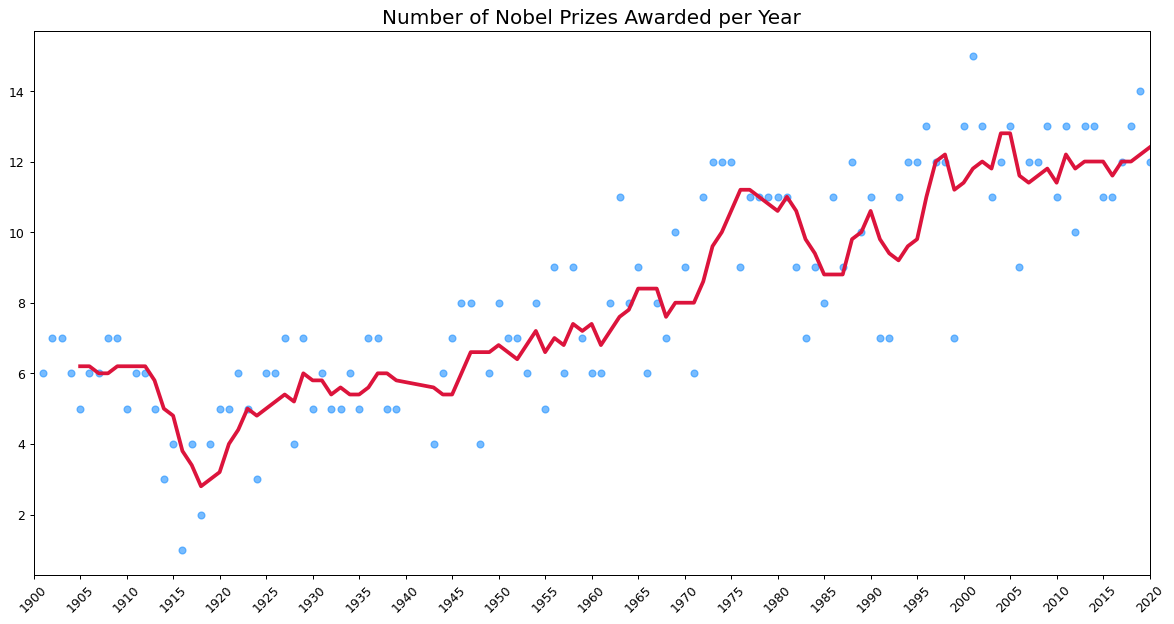

In [36]:
# Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).
plt.figure(figsize=(16,8), dpi=90)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=16)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
plt.scatter(prizes_per_year.year,
            prizes_per_year.prize,
            c='dodgerblue',
            alpha=0.6,
            s=30)

plt.plot(prizes_per_year.year,
         rolling_avg.prize,
         c='crimson',
         linewidth=3)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [37]:
# Calculate the average prize share of the winners on a year by year basis.
yearly_avg_share = df_data.groupby('year', as_index=False).agg({'share_pct': pd.Series.mean})

In [38]:
# Calculate the 5 year rolling average of the percentage share.
share_moving_average = yearly_avg_share.rolling(window=5).mean()

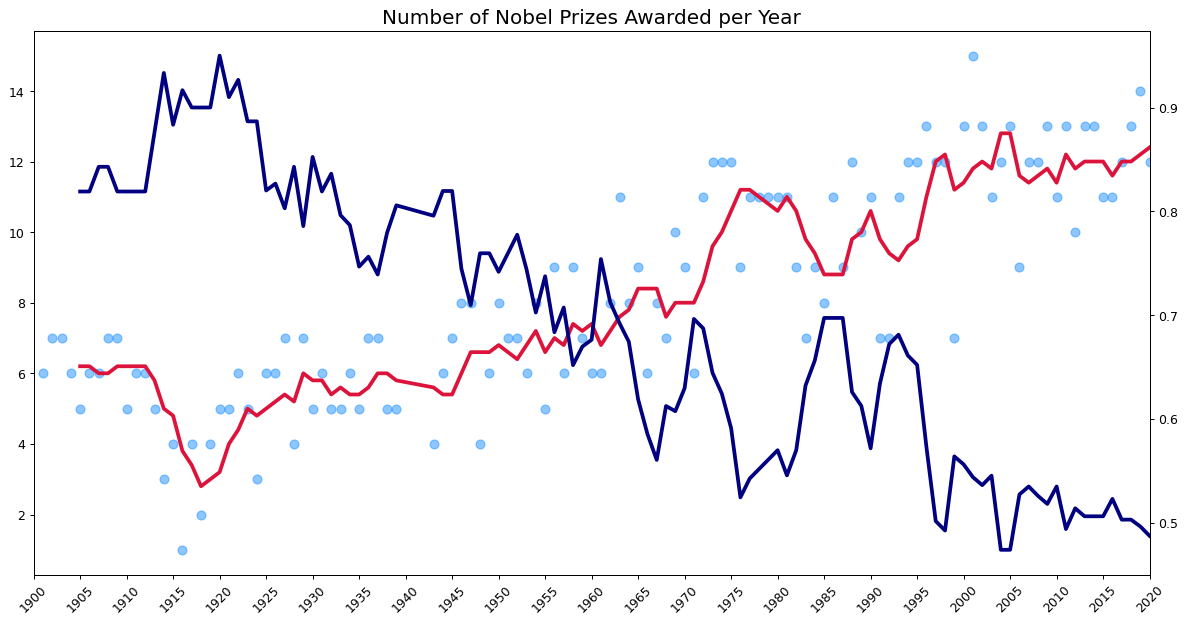

In [39]:
# Copy-paste the cell from the chart you created above.
# Modify the code to add a secondary axis to your Matplotlib chart.

plt.figure(figsize=(16,8), dpi=90)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=16)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           rotation=45)
 
ax1 = plt.gca() # Get current axis
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
 
ax1.scatter(prizes_per_year.year,
            prizes_per_year.prize,
            c='dodgerblue',
            alpha=0.5,
            s=50)

ax1.plot(prizes_per_year.year,
         rolling_avg.prize,
         c='crimson',
         linewidth=3)

# Plot the rolling average of the prize share on this chart.
ax2.plot(prizes_per_year.year,
         share_moving_average.share_pct,
         c='navy',
         linewidth=3)

plt.show()

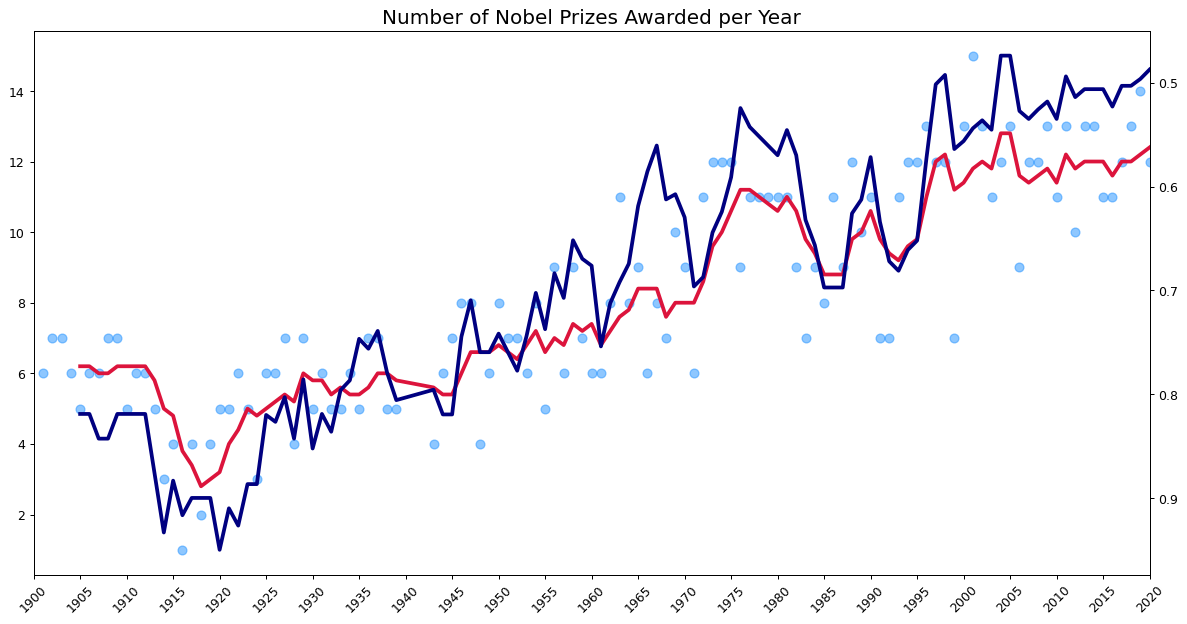

In [40]:
# See if you can invert the secondary y-axis to make the relationship even more clear.
plt.figure(figsize=(16,8), dpi=90)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=16)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           rotation=45)
 
ax1 = plt.gca() # Get current axis
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)

# Can invert axis
ax2.invert_yaxis()

ax1.scatter(prizes_per_year.year,
            prizes_per_year.prize,
            c='dodgerblue',
            alpha=0.5,
            s=50)

ax1.plot(prizes_per_year.year,
         rolling_avg.prize,
         c='crimson',
         linewidth=3)

# Plot the rolling average of the prize share on this chart.
ax2.plot(prizes_per_year.year,
         share_moving_average.share_pct,
         c='navy',
         linewidth=3)

plt.show()

What do we see on the chart? Well, there is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first and second world wars. Note that instead of there being a zero entry for those years, we instead see the effect of the wards as missing blue dots.

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-20_14-38-11-076469c853c7b83bc6a9ec20fc1a0aaf.png" width=700>

# A Choropleth Map and the Countries with the Most Prizes
For this next bit, we're going to compare which countries actually get the most prizes. And we're also going to look at in which categories those prizes are awarded. This has me feeling a little like I'm at the Olympics 😊.

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top21_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [41]:
# Create a Pandas DataFrame called top21_countries that has the two columns (birth_country_current, prize).
# The prize column should contain the total number of prizes won.
top_countries = df_data.groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count})
top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]

Is it best to use birth_country, birth_country_current or organization_country?

What are some potential problems when using birth_country or any of the others?

Which column is the least problematic?

In [42]:
print(f'The problem with using birth_country is that it has multiple values for the same country, and has {len(df_data.birth_country.value_counts())} unique values')
print(f'The problem with using organization_country is that it has the most NaN values and so it is missing data, it has a {len(df_data.organization_country.value_counts())} unique values and it has data for only {df_data.organization_country.count()} rows')
print(f'The least problematic columns is birth_country_current, with a length of {len(df_data.birth_country_current.value_counts())}')
print(df_data.birth_country.count())
print(df_data.organization_country.count())
print(df_data.birth_country_current.count())

The problem with using birth_country is that it has multiple values for the same country, and has 124 unique values
The problem with using organization_country is that it has the most NaN values and so it is missing data, it has a 27 unique values and it has data for only 708 rows
The least problematic columns is birth_country_current, with a length of 79
934
708
934


In [43]:
# Then use plotly to create a horizontal bar chart showing the number of prizes won by each country.
fig = px.bar(top20_countries,
             x = 'prize',
             y = 'birth_country_current',
             orientation='h',
             color='prize',
             color_continuous_scale='viridis',
             title='Top 21 Countries by Number of Prizes')
fig.update_layout(xaxis_title='Number of Prizes',
                  yaxis_title='Country')
fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [44]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
...,...,...,...
32,Iceland,ISL,1
47,Madagascar,MDG,1
34,Indonesia,IDN,1
36,Iraq,IRQ,1


In [45]:
fig = px.choropleth(df_countries,
                    locations='ISO',
                    color='prize',
                    hover_name='birth_country_current',
                    color_continuous_scale='rainbow',
                    width=800, height=400)

fig.update_layout(coloraxis_showscale=True)

fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


Preparing our data to show the breakdown by category and country is challenging. We'll take a two-step approach here. First we count the prizes by category in each country:

In [46]:
country_category_prize = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
country_category_prize.sort_values(by='prize', inplace=True, ascending=False)

Next, we can merge the DataFrame above with the top20_countries DataFrame that we created previously. That way we get the total number of prizes in a single column too. This is important since we want to control the order for our bar chart.

In [47]:
merged_df = pd.merge(country_category_prize, top20_countries, on='birth_country_current')
# Change column names
merged_df.columns = ['country', 'category', 'cat_prize', 'total_prize'] 

merged_df.sort_values(by='total_prize', inplace=True)

In [48]:
fig = px.bar(merged_df,
             x = 'cat_prize',
             y = 'country',
             color = 'category',
             title='Number of Prizes per Category split by Country',
             orientation='h',
             width=1000)
 
fig.update_layout(xaxis_title='Number of Prizes',
                  yaxis_title='Country')
fig.show()

Splitting the country bar chart by category allows us to get a very granular look at the data and answer a whole bunch of questions. For example, we see is that the US has won an incredible proportion of the prizes in the field of Economics. In comparison, Japan and Germany have won very few or no economics prize at all. Also, the US has more prizes in physics or medicine alone than all of France's prizes combined. On the chart, we also see that Germany won more prizes in physics than the UK and that France has won more prizes in peace and literature than Germany, even though Germany has been awarded a higher total number of prizes than France.

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [49]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [50]:
# Create a series that has the cumulative sum
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [51]:
l_chart = px.line(cumulative_prizes,
                  x='year', 
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current',
                  title='Number of Prizes Won by Each Country Over Time')
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
 
l_chart.show()

What we see is that the United States really started to take off after the Second World War which decimated Europe. Prior to that, the Nobel prize was pretty much a European affair. Very few laureates were chosen from other parts of the world. This has changed dramatically in the last 40 years or so. There are many more countries represented today than in the early days. Interestingly we also see that the UK and Germany traded places in the 70s and 90s on the total number of prizes won. Sweden being 5th place pretty consistently over many decades is quite interesting too. Perhaps this reflects a little bit of home bias? 😊

# Create Sunburst Charts for a Detailed Regional Breakdown of Research Locations

Many Nobel laureates are affiliated with a university, a laboratory, or a research organisation (apart from Literature and Peace prize winners as we've seen). But the world is a big place. Which research institutions had the most Nobel laureates working there at the time of making the discovery?

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=800>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [52]:
# Solution
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)

In [53]:
prizes_per_organisation = df_data.groupby(by='organization_name', as_index=False).agg({'prize': pd.Series.count})
prizes_per_organisation.sort_values(by='prize', inplace=True)
top_organizations = prizes_per_organisation[-20:]

In [54]:
fig = px.bar(top_organizations,
             x='prize',
             y='organization_name',
             color='prize',
             color_continuous_scale='haline',
             orientation='h',
             title='Top 20 Research Institutions by Number of Prizes')

fig.update_layout(xaxis_title='Number of Prizes',
                  yaxis_title='Institution',
                  coloraxis_showscale=False)

fig.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [55]:
# Solution
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)

In [56]:
organisation_cities = df_data.groupby(by='organization_city', as_index=False).agg({'prize': pd.Series.count})
organisation_cities.sort_values(by='prize', inplace=True)
top20_organisation_cities = organisation_cities[-20:]

In [57]:
fig = px.bar(x=top20_org_cities.values,
             y=top20_org_cities.index,
             orientation='h',
             color=top20_org_cities.values,
             color_continuous_scale='plasma',
             title='Top 20 Cities of Research Institutions by Number of Prizes')

fig.update_layout(xaxis_title='Number of Prizes',
                  yaxis_title='City of Organization',
                  coloraxis_showscale=False)

fig.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

Contrast the above chart with the birth city of the Nobel laureates.

* Would you expect to see a similar ranking for where the laureates are born versus where most discoveries are made?
* Would you expect to see the most populous cities producing the highest number of Nobel laureates?

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [58]:
# Solution
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)

In [59]:
# My way
birth_city_of_nobel_laureates = df_data.groupby(by='birth_city', as_index=False).agg({'prize': pd.Series.count})
birth_city_of_nobel_laureates.sort_values(by='prize', inplace=True)
top20_birth_city_of_nobel_laureates = birth_city_of_nobel_laureates[-20:]

In [60]:
fig = px.bar(top20_birth_city_of_nobel_laureates,
             x='prize',
             y='birth_city',
             color='prize',
             color_continuous_scale='plasma',
             orientation='h',
             title='Top 20 Birth Cities of Nobel Laureates by Number of Prizes')

fig.update_layout(xaxis_title='Number of Prizes',
                  yaxis_title='Birth Cities of Nobel Laureates',
                  coloraxis_showscale=False)

fig.show()

A higher population definitely means that there's a higher chance of a Nobel laureate to be born there. New York, Paris, and London are all very populous. However, Vienna and Budapest are not and still produced many prize winners. That said, much of the ground-breaking research does not take place in big population centres, so the list of birth cities is quite different from the list above. Cambridge Massachusets, Stanford, Berkely and Cambridge (UK) are all the places where many discoveries are made, but they are not the birthplaces of laureates.

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



Each country has a number of cities, which in turn contain the research organisations. The sunburst chart is perfect for representing this relationship. It will give us an idea of how geographically concentrated scientific discoveries are!

In [61]:
# Solution
country_city_org = df_data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)

In [62]:
# My way
country_city_org = df_data.groupby(by=['organization_country',
                                       'organization_city',
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
country_city_org.sort_values(by='prize', inplace=True, ascending=False)

In [63]:
fig = px.sunburst(country_city_org, 
                  path=['organization_country', 'organization_city', 'organization_name'], 
                  values='prize', 
                  color=None,
                  title='Where do Discoveries Take Place?',
                  width=800)

fig.update_layout(xaxis_title='Number of Prizes', 
                  yaxis_title='City',
                  coloraxis_showscale=False)

fig.show()

France is a great example of concentration. Practically all the organisations affiliated with Nobel prize winners are in Paris. In contrast, scientific discoveries are much more spread out across Germany. Meanwhile, the UK is dominated by Cambridge and London.

# Patterns in the Laureate Age at the Time of the Award

* How old are the Nobel laureates at the time when they win the prize?
* Does this vary by category?
* Also, how has the age of the laureates changed over time?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [158]:
# SOLUTION 1:
df_data['winning_age'] = df_data.year - df_data.birth_date.dt.year

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [157]:
# SOLUTION 2:
# What are the names of the youngest and oldest Nobel laureate?
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


John Goodenough was 97 years old when he got the Nobel prize!!! Holy moly. Interestingly John was born to American parents while they were in Germany. This is one example where our analysis of countries counts an extra "German" prize even though he is an American citizen. Too bad we don't have a nationality column in our dataset! Nonetheless, this goes to show it is never too late to win a Nobel prize. I'm keeping my fingers crossed for you!

In [94]:
individuals = df_data[df_data.laureate_type == 'Individual']

In [95]:
individuals[individuals.winning_age == individuals.winning_age.min()][['year', 'full_name', 'sex','winning_age', 'birth_country', 'birth_city', 'birth_country_current', 'category', 'motivation']]

,year,full_name,sex,winning_age,birth_country,birth_city,birth_country_current,category,motivation
885,2014,Malala Yousafzai,Female,17,Pakistan,Mingora,Pakistan,Peace,"""for their struggle against the suppression of..."


In [96]:
individuals[individuals.winning_age == individuals.winning_age.max()][['year', 'full_name', 'sex','winning_age', 'birth_country', 'birth_city', 'birth_country_current', 'category', 'motivation']]

,year,full_name,sex,winning_age,birth_country,birth_city,birth_country_current,category,motivation
937,2019,John Goodenough,Male,97,Germany,Jena,Germany,Chemistry,“for the development of lithium-ion batteries”


Using `.describe()` is a fantastic way to get a feeling for how the numbers are distributed in a particular column. However, actually visualising them on a histogram to see their distribution is highly recommended too since it allows us to see if we have a bell-shaped curve or something else.

In [160]:
# SOLUTION 3:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

In [99]:
int(round(individuals.winning_age.mean(),0))

60

In [103]:
individuals.describe()

,year,share_pct,winning_age
count,930.00,930.00,930.00
mean,"1,971.63",0.62,59.96
std,33.88,0.29,12.63
min,"1,901.00",0.25,17.00
25%,"1,947.25",0.33,51.00
50%,"1,977.00",0.50,60.00
75%,"2,001.00",1.00,69.00
max,"2,020.00",1.00,97.00


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [104]:
individuals.winning_age.describe()

count   930.00
mean     59.96
std      12.63
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

Here's what the histogram looks like:

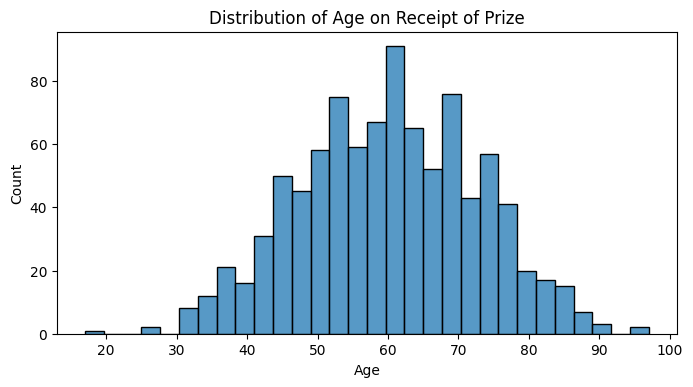

In [165]:
plt.figure(figsize=(8,4), dpi=100)

sns.histplot(data=df_data,
             x='winning_age',
             bins=30)

plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


### **Solution 4:**

The histogram above shows us the distribution across the entire dataset, over the entire time period. But perhaps the age has changed over time.

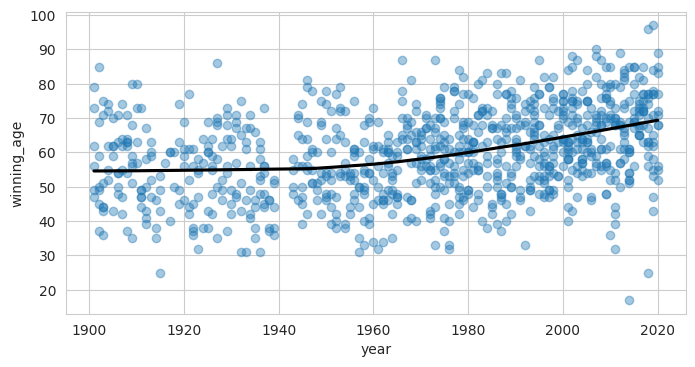

In [167]:
# Solution 4
plt.figure(figsize=(8,4), dpi=100)
with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='winning_age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})
 
plt.show()

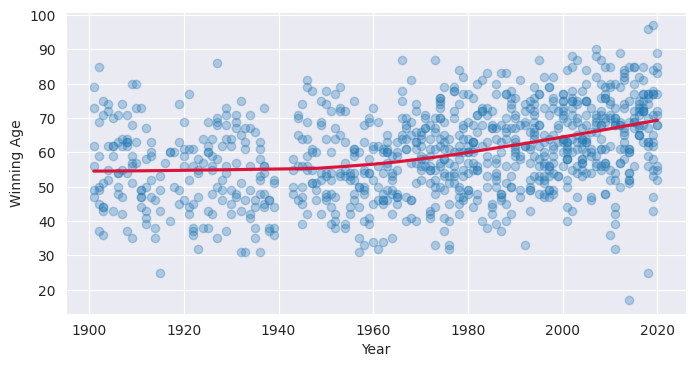

In [171]:
# My Way
plt.figure(figsize=(8,4), dpi=100)

with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=individuals,
                   x="year",
                   y="winning_age",
                   lowess=True,
                   scatter_kws={'alpha': 0.3},
                   line_kws={'color': 'crimson'})

  ax.set(xlabel='Year',
         ylabel='Winning Age')

In [123]:
print('According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?')
print('About 55 years old.')
print('According to the best fit line, what age would it predict for a Nobel laureate in 2020?')
print('About 70 years old.')

According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
About 55 years old.
According to the best fit line, what age would it predict for a Nobel laureate in 2020?
About 70 years old.


**Solution for interpretation:**
Using the lowess parameter allows us to plot a local linear regression. This means the best fit line is still linear, but it's more like a moving average which gives us a non-linear shape across the entire series. This is super neat because it clearly shows how the Nobel laureates are getting their award later and later in life. From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award! The other thing that we see in the chart is that in the last 10 years the spread has increased. We've had more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old. Lately, that range has widened.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?
* You can also use plotly to create the box plot if you like.

**Solution 5: Age Differences between Categories**

Seaborn allows us to create the above chart by category. But first, let's look at a box plot by category.

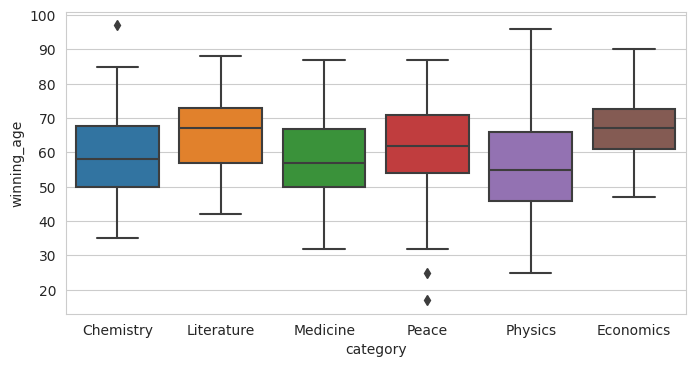

In [173]:
# Solution 5:
plt.figure(figsize=(8,4), dpi=100)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age')
 
plt.show()

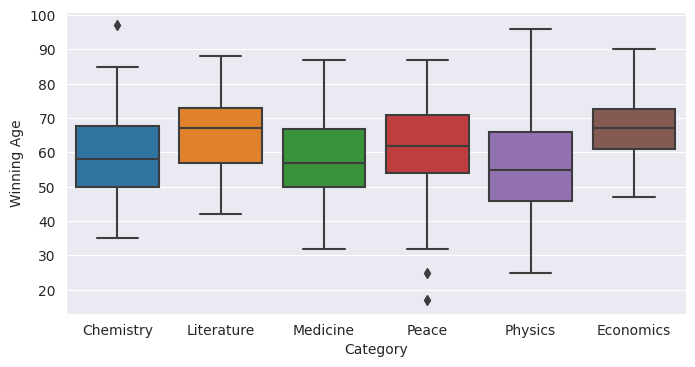

In [176]:
# My solution
plt.figure(figsize=(8,4), dpi=100)

with sns.axes_style('darkgrid'):
  ax = sns.boxplot(data=df_data,
                   x="category",
                   y="winning_age")

  ax.set(xlabel='Category',
         ylabel='Winning Age')
  
  plt.show()

**Interpretation:**
The box plot shows us the mean, the quartiles, the maximum and the minimum values. It raises an interesting question: "Are peace prize winners really older than physics laureates?".

In [130]:
fig = px.box(x = individuals.category,
             y = individuals.winning_age,
             title='Winning Age per Category',
             width=600, height=400)
 
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Winning Age')

fig.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


**Solution 6: Laureate Age over Time by Category**

To get a more complete picture, we should look at how the age of winners has changed over time. The box plot above looked at the dataset as a whole.

In [ ]:
# Solution 6:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

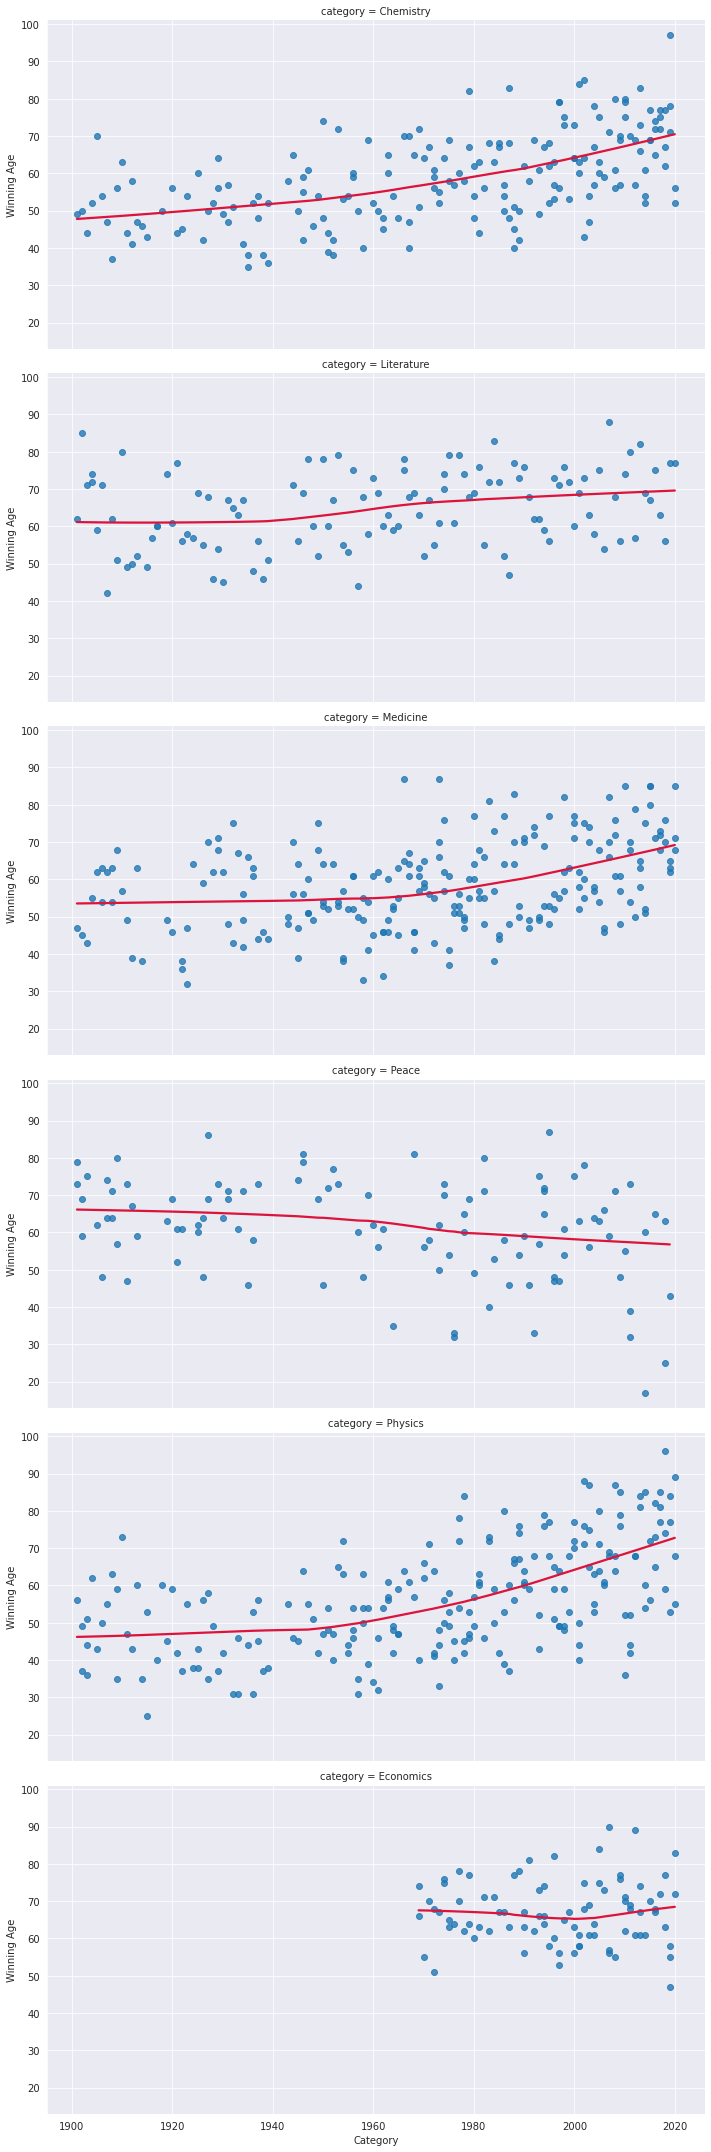

In [185]:
# My way
with sns.axes_style('darkgrid'):
  ax = sns.lmplot(data=df_data,
                  x='year',
                  y='winning_age',
                  row='category',
                  lowess=True, 
                  aspect=2,
                  line_kws = {'color': 'crimson'})

  ax.set(xlabel='Category',
         ylabel='Winning Age')
  plt.show()

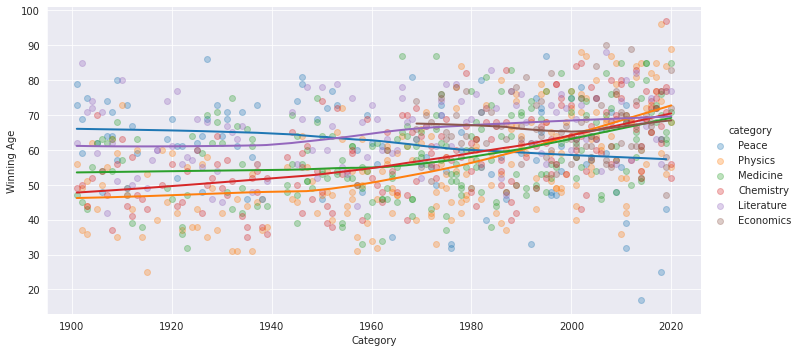

In [188]:
with sns.axes_style('darkgrid'):
  ax = sns.lmplot(data=individuals,
                  x='year',
                  y='winning_age',
                  hue='category',
                  lowess=True, 
                  aspect=2,
                  scatter_kws={'alpha': 0.3},
                  line_kws={'linewidth': 2})

  ax.set(xlabel='Category',
         ylabel='Winning Age')
plt.show()

# Learning Points & Summary

In this lesson, we reviewed many concepts that we've covered previously, including:

* How to uncover and investigate NaN values.
* How to convert objects and string data types to numbers.
* Creating donut and bar charts with plotly.
* Create a rolling average to smooth out time-series data and show a trend.
* How to use `.value_counts()`, `.groupby()`, `.merge()`, `.sort_values()` and `.agg()`.

In addition, we learned many new things too. We looked at how to:

* Create a Choropleth to display data on a map.
* Create bar charts showing different segments of the data with plotly.
* Create Sunburst charts with plotly.
* Use Seaborn's `.lmplot()` and show best-fit lines across multiple categories using the `row`, `hue`, and `lowess` parameters.
* Understand how a different picture emerges when looking at the same data in different ways (e.g., box plots vs a time series analysis).
* See the distribution of our data and visualise descriptive statistics with the help of a histogram in Seaborn.

